<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Cyberbullying Tweet Classification</p> 

<div style="background-color:#d5eae9; padding:20px; font-size:15px">

**This notebook includes the following:**

- Data importing
- Exploratory data analysis (EDA)
- Preprocessing 
- Preparing the data to train a model
- Training with ML model
- Training with CNN model
- Model evaluation

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
import requests
from PIL import Image
from imblearn.over_sampling import RandomOverSampler
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Importing</p> 

In [3]:
file = pd.read_csv(r"F:\Projects\cyberbullying tweet classification\twitter_parsed_dataset.csv")

In [4]:
file

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0
...,...,...,...,...,...
16846,5.75606766236475E+017,5.75606766236475E+017,"Feeling so sorry for the girls, they should be...",none,0.0
16847,5.72333822886326E+017,5.72333822886326E+017,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,5.72326950057845E+017,5.72326950057845E+017,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,5.74799612642357E+017,5.74799612642357E+017,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [5]:
file.Annotation.value_counts()

Annotation
none      11501
sexism     3377
racism     1970
Name: count, dtype: int64

In [7]:
file.drop(["index","id"],axis=1,inplace=True)

In [8]:
file

,Text,Annotation,oh_label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,#mkr No No No No No No,none,0.0
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",none,0.0
16847,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [9]:
file.rename(columns={"oh_label":"Label"},inplace=True)

In [10]:
file.Label.isna().sum()

3

In [11]:
file=file.dropna(subset="Label")

In [12]:
file

,Text,Annotation,Label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,#mkr No No No No No No,none,0.0
...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",none,0.0
16847,#MKR 'pretty good dishes we're happy with' - O...,none,0.0
16848,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0


In [13]:
def count_symbols(text):
    hashtag_count = len(re.findall(r'#',text))
    mention_count= len(re.findall(r'@',text))
    return hashtag_count, mention_count

file[['num_hashtags','num_mentions']] = file['Text'].apply(lambda x: pd.Series(count_symbols(x)))
    
    

In [14]:
file.Text[0]

'@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history of Islamic slavery. https://t.co/xWJzpSodGj'

In [15]:
file

,Text,Annotation,Label,num_hashtags,num_mentions
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0,0,3
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0,0,1
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0,0,1
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,0,1
4,#mkr No No No No No No,none,0.0,1,0
...,...,...,...,...,...
16846,"Feeling so sorry for the girls, they should be...",none,0.0,1,0
16847,#MKR 'pretty good dishes we're happy with' - O...,none,0.0,1,0
16848,RT @colonelkickhead: Deconstructed lemon tart!...,none,0.0,1,1
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,none,0.0,0,3


In [16]:
print('_________Sample tweets_________')
simple_tweet = file[file['Label'] == 0]['Text'].iloc[1]
print('\nSimple tweet: ', simple_tweet)
sexist_tweet = file[file['Annotation'] == 'sexism']['Text'].iloc[0]
print('\n\nSexist tweet: ', sexist_tweet)
racist_tweet = file[file['Annotation'] == 'racism']['Text'].iloc[0]
print('\n\nRacist tweet: ', racist_tweet)
print('\n_______________________________')

_________Sample tweets_________

Simple tweet:  @ShreyaBafna3 Now you idiots claim that people who tried to stop him from becoming a terrorist made him a terrorist. Islamically brain dead.


Sexist tweet:  RT @Mooseoftorment Call me sexist, but when I go to an auto place, I'd rather talk to a guy


Racist tweet:  @g0ssipsquirrelx Wrong, ISIS follows the example of Mohammed and the Quran exactly.

_______________________________


<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p> 


In [17]:
print('Label distribution')
print(file.Label.value_counts())
print('-------------------------\n')
print('Annotation distribution')
print(file.Annotation.value_counts())
print('-------------------------\n')
print('Grouping of Annotation with label')
print(file.groupby('Annotation')['Label'].sum())

Label distribution
Label
0.0    11501
1.0     5347
Name: count, dtype: int64
-------------------------

Annotation distribution
Annotation
none      11501
sexism     3377
racism     1970
Name: count, dtype: int64
-------------------------

Grouping of Annotation with label
Annotation
none         0.0
racism    1970.0
sexism    3377.0
Name: Label, dtype: float64


In [18]:

def add_spines(colour = '#425169', linewidth = 2):
    
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines[['bottom', 'left', 'top', 'right']].set_color(colour)
    ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(linewidth)

def roc_auc(predictions,target):
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [19]:
def bully_palette(file,column, positions_to_change: list):

    palette = ['#96898b']*file[column].nunique()
    new_values = ['#cc253b']*len(positions_to_change)
    for position, new_value in zip(positions_to_change, new_values):
        palette[position] = new_value
    return sns.color_palette(palette)
 

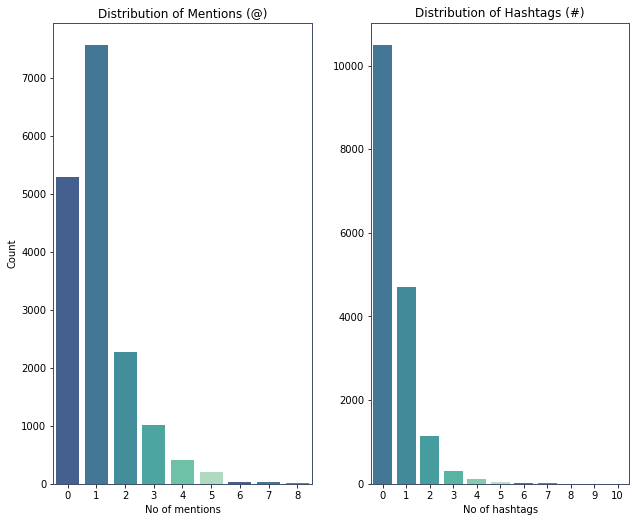

In [20]:
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
sns.countplot(x='num_mentions', data=file, palette =  sns.color_palette("mako", n_colors=9)[3:])
plt.xlabel('No of mentions')
plt.ylabel('Count')
plt.title('Distribution of Mentions (@)')
add_spines(linewidth=1)

plt.subplot(1, 2, 2)
sns.countplot(x='num_hashtags', data=file, palette = sns.color_palette("mako", n_colors=11)[5:])
plt.xlabel('No of hashtags')
plt.ylabel('')
plt.title('Distribution of Hashtags (#)')
add_spines(linewidth=1)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.23, hspace=0.3)
plt.show()

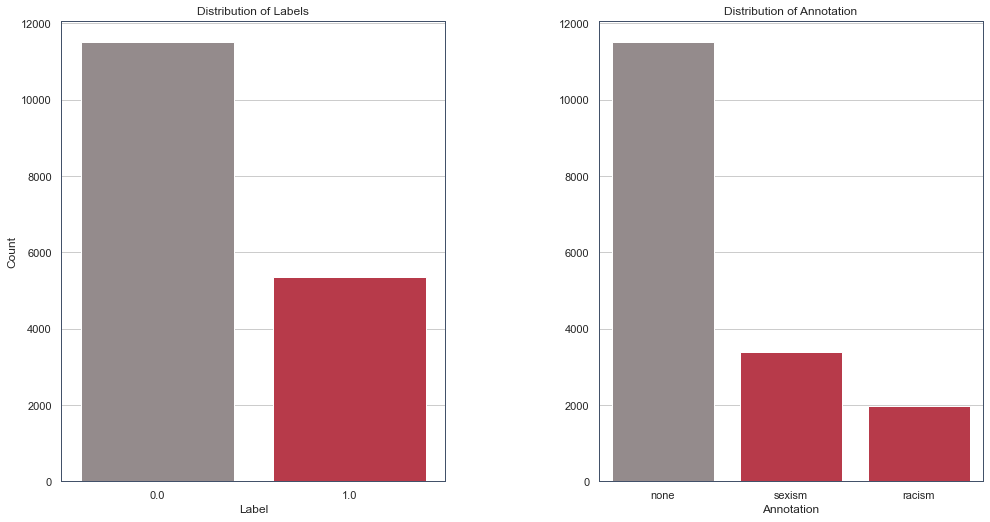

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
sns.countplot(x='Label', data=file, palette = bully_palette(file, 'Label', [1]))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
add_spines(linewidth=1)

plt.subplot(1, 2, 2)
sns.countplot(x='Annotation', data=file, palette = bully_palette(file,'Annotation', [1, 2]))
plt.xlabel('Annotation')
plt.ylabel('')
plt.title('Distribution of Annotation')
add_spines(linewidth=1)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.3)
plt.show()

<Figure size 1152x720 with 0 Axes>

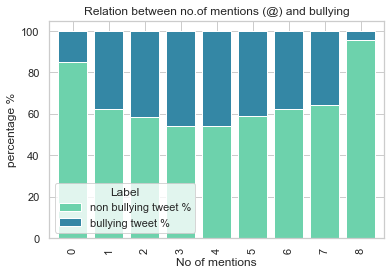

In [22]:
plt.figure(figsize=(16,10))
mention_label_cross = pd.crosstab(file['num_mentions'], file['Label'])
mention_label_cross['sum'] = mention_label_cross[0.0] + mention_label_cross[1.0]
mention_label_cross['non bullying tweet %'] = mention_label_cross[0.0]/mention_label_cross['sum']*100
mention_label_cross['bullying tweet %'] = mention_label_cross[1.0]/mention_label_cross['sum']*100
mention_label_cross = mention_label_cross.drop([0.0, 1.0, 'sum'], axis=1)

mention_label_cross.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#6dd2ac', '#3487a5'], width=0.8)
plt.xlabel('No of mentions')
plt.ylabel('percentage %')
plt.title('Relation between no.of mentions (@) and bullying')
plt.show()

In [23]:

sia = SentimentIntensityAnalyzer()

 
def get_sentiment(text):                   # Function to get sentiment of a text
    compound_score = sia.polarity_scores(text)['compound']
    return 'positive' if compound_score >= 0 else 'negative'


file['Sentiment_Label'] = file['Text'].apply(get_sentiment)

file.head()

,Text,Annotation,Label,num_hashtags,num_mentions,Sentiment_Label
0,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0,0,3,negative
1,@ShreyaBafna3 Now you idiots claim that people...,none,0.0,0,1,negative
2,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0,0,1,positive
3,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0,0,1,negative
4,#mkr No No No No No No,none,0.0,1,0,negative


In [24]:
file.Text[2]

"RT @Mooseoftorment Call me sexist, but when I go to an auto place, I'd rather talk to a guy"

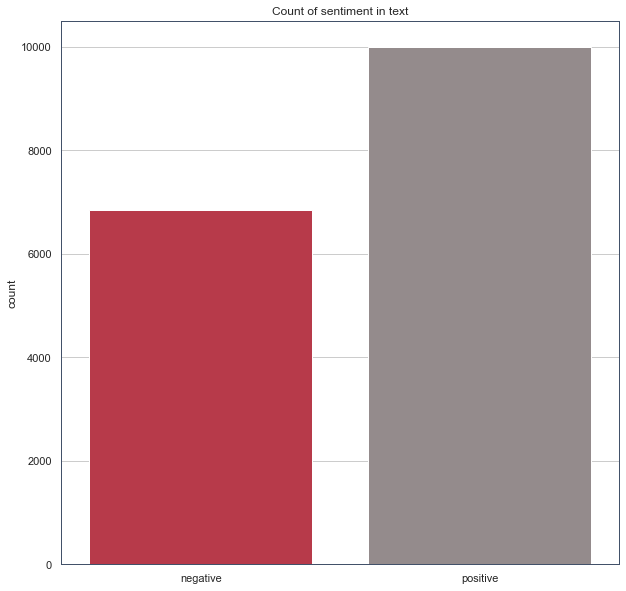

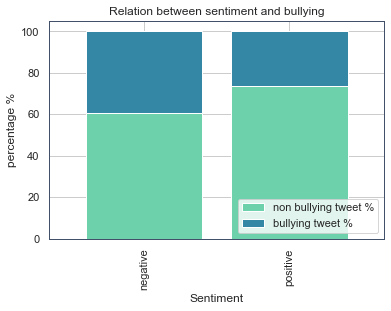

In [25]:
plt.figure(figsize=(10,10))
file['Sentiment_Label'].value_counts()
sns.countplot(x='Sentiment_Label', data=file, palette = bully_palette(file, 'Sentiment_Label', [0]))
plt.title('Count of sentiment in text')
plt.xlabel('')
add_spines(linewidth=1)

sent_label_cross = pd.crosstab(file['Sentiment_Label'], file['Label'])
sent_label_cross['sum'] = sent_label_cross[0.0] + sent_label_cross[1.0]
sent_label_cross['non bullying tweet %'] = sent_label_cross[0.0]/sent_label_cross['sum']*100
sent_label_cross['bullying tweet %'] = sent_label_cross[1.0]/sent_label_cross['sum']*100
sent_label_cross = sent_label_cross.drop([0.0, 1.0, 'sum'], axis=1)

ax = sent_label_cross.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#6dd2ac', '#3487a5'], width=0.8)
plt.xlabel('Sentiment')
plt.ylabel('percentage %')
plt.title('Relation between sentiment and bullying')
ax.legend(loc='lower right')
add_spines(linewidth=1)

plt.show()

In [26]:
 def extract_hashtags(text):                       # Function to extract hashtags from a text
    return re.findall(r'#\w+', text)

file['Hashtags'] = file['Text'].apply(extract_hashtags)

 
def extract_mentions(text):         # Function to extract hashtags from a text
    return re.findall(r'@\w+', text)

file['Mentions'] = file['Text'].apply(extract_mentions)

def create_counter_df(file):
    
    all_counts = [tag for counts_list in file for tag in counts_list]  # Flatten the list of hashtags and count their occurrences
    label_counts = Counter(all_counts)

    
    counts_df = pd.DataFrame(list(label_counts.items()), columns=['Label', 'Count']) # Create a DataFrame from the Counter dictionary
    counts_df = counts_df.sort_values(by='Count', ascending=False)
    return counts_df
    
mentions_df = create_counter_df(file['Mentions'])
top_10_mentions = mentions_df.head(10)
sexist_mentions = create_counter_df(file[file.Annotation=='sexism']["Mentions"])
top_10_sexist_mentions = sexist_mentions.head(10)
racist_mentions = create_counter_df(file[file.Annotation=='racism']["Mentions"])
top_10_racist_mentions = racist_mentions.head(10)

hashtags_df = create_counter_df(file['Hashtags'])
top_10_hashtags = hashtags_df.head(10)
sexist_hashtags = create_counter_df(file[file.Annotation=='sexism']["Hashtags"])
top_10_sexist_hashtags = sexist_hashtags.head(10)
racist_hashtags = create_counter_df(file[file.Annotation=='racism']["Hashtags"])
top_10_racist_hashtags = racist_hashtags.head(10)

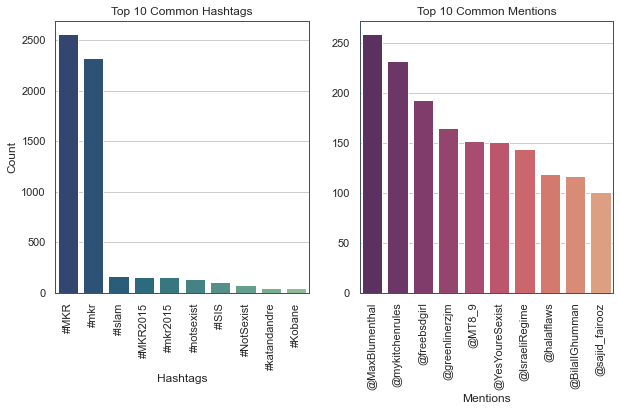

In [27]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.barplot(x='Label', y='Count', data=top_10_hashtags, palette='crest_r')
plt.title('Top 10 Common Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.xticks(rotation=90)
add_spines(linewidth=1)

plt.subplot(122)
sns.barplot(x='Label', y='Count', data=top_10_mentions, palette='flare_r')
plt.title('Top 10 Common Mentions')
plt.xlabel('Mentions')
plt.ylabel('')
plt.xticks(rotation=90)
add_spines(linewidth=1)

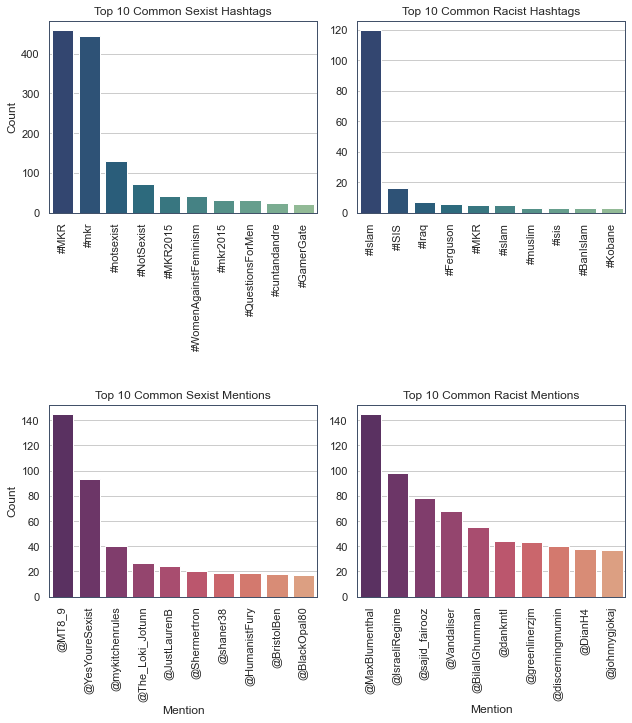

In [28]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
sns.barplot(x='Label', y='Count', data=top_10_sexist_hashtags, palette='crest_r')
plt.title('Top 10 Common Sexist Hashtags')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=90)
add_spines(linewidth=1)

plt.subplot(222)
sns.barplot(x='Label', y='Count', data=top_10_racist_hashtags, palette='crest_r')
plt.title('Top 10 Common Racist Hashtags')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
add_spines(linewidth=1)

plt.subplot(223)
sns.barplot(x='Label', y='Count', data=top_10_sexist_mentions, palette='flare_r')
plt.title('Top 10 Common Sexist Mentions')
plt.xlabel('Mention')
plt.ylabel('Count')
plt.xticks(rotation=90)
add_spines(linewidth=1)

plt.subplot(224)
sns.barplot(x='Label', y='Count', data=top_10_racist_mentions, palette='flare_r')
plt.title('Top 10 Common Racist Mentions')
plt.xlabel('Mention')
plt.ylabel('')
plt.xticks(rotation=90)
add_spines(linewidth=1)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.15, hspace=1)
plt.show()

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p> 

In [29]:
import spacy


In [30]:
nlp = spacy.load("en_core_web_sm")
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
def clean_tweet(tweet):
 
    tweet = re.sub(r'http\S+', '', tweet)   # Remove URLs 
    tweet = re.sub(r'@[A-Za-z0-9_]+|#[A-Za-z0-9_]+', '', tweet) # Remove mentions and hashtags
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet) # Remove special characters, numbers, and punctuation
    tweet = re.sub(r'\bRT\b', '', tweet) # Remove 'RT' (Retweet) indicator
    tweet = tweet.lower() # Convert to lowercase 
    doc = nlp(tweet)  # Lemmatization
    tweet = ' '.join([token.lemma_ for token in doc])   # Lemmatize each token and join them back into a string
    
    return tweet

In [32]:
file['Text'] = file['Text'].apply(clean_tweet)
file.head()

,Text,Annotation,Label,num_hashtags,num_mentions,Sentiment_Label,Hashtags,Mentions
0,I read they in contextno change in mean th...,none,0.0,0,3,negative,[],"[@halalflaws, @biebervalue, @greenlinerzjm]"
1,now you idiot claim that people who try to s...,none,0.0,0,1,negative,[],[@ShreyaBafna3]
2,call I sexist but when I go to an auto plac...,sexism,1.0,0,1,positive,[],[@Mooseoftorment]
3,wrong isis follow the example of mohammed an...,racism,1.0,0,1,negative,[],[@g0ssipsquirrelx]
4,no no no no no no,none,0.0,1,0,negative,[#mkr],[]


In [33]:
print('_________Sample clean tweets_________')
simple_tweet = file[file['Label'] == 0]['Text'].iloc[1]
print('\n\nSimple tweet: ', simple_tweet)
sexist_tweet = file[file['Annotation'] == 'sexism']['Text'].iloc[0]
print('\n\nSexist tweet: ', sexist_tweet)
racist_tweet = file[file['Annotation'] == 'racism']['Text'].iloc[0]
print('\n\nRacist tweet: ', racist_tweet)
print('\n\n_______________________________')

_________Sample clean tweets_________


Simple tweet:    now you idiot claim that people who try to stop he from become a terrorist make he a terrorist islamically brain dead


Sexist tweet:     call I sexist but when I go to an auto place i d rather talk to a guy


Racist tweet:    wrong isis follow the example of mohammed and the quran exactly


_______________________________


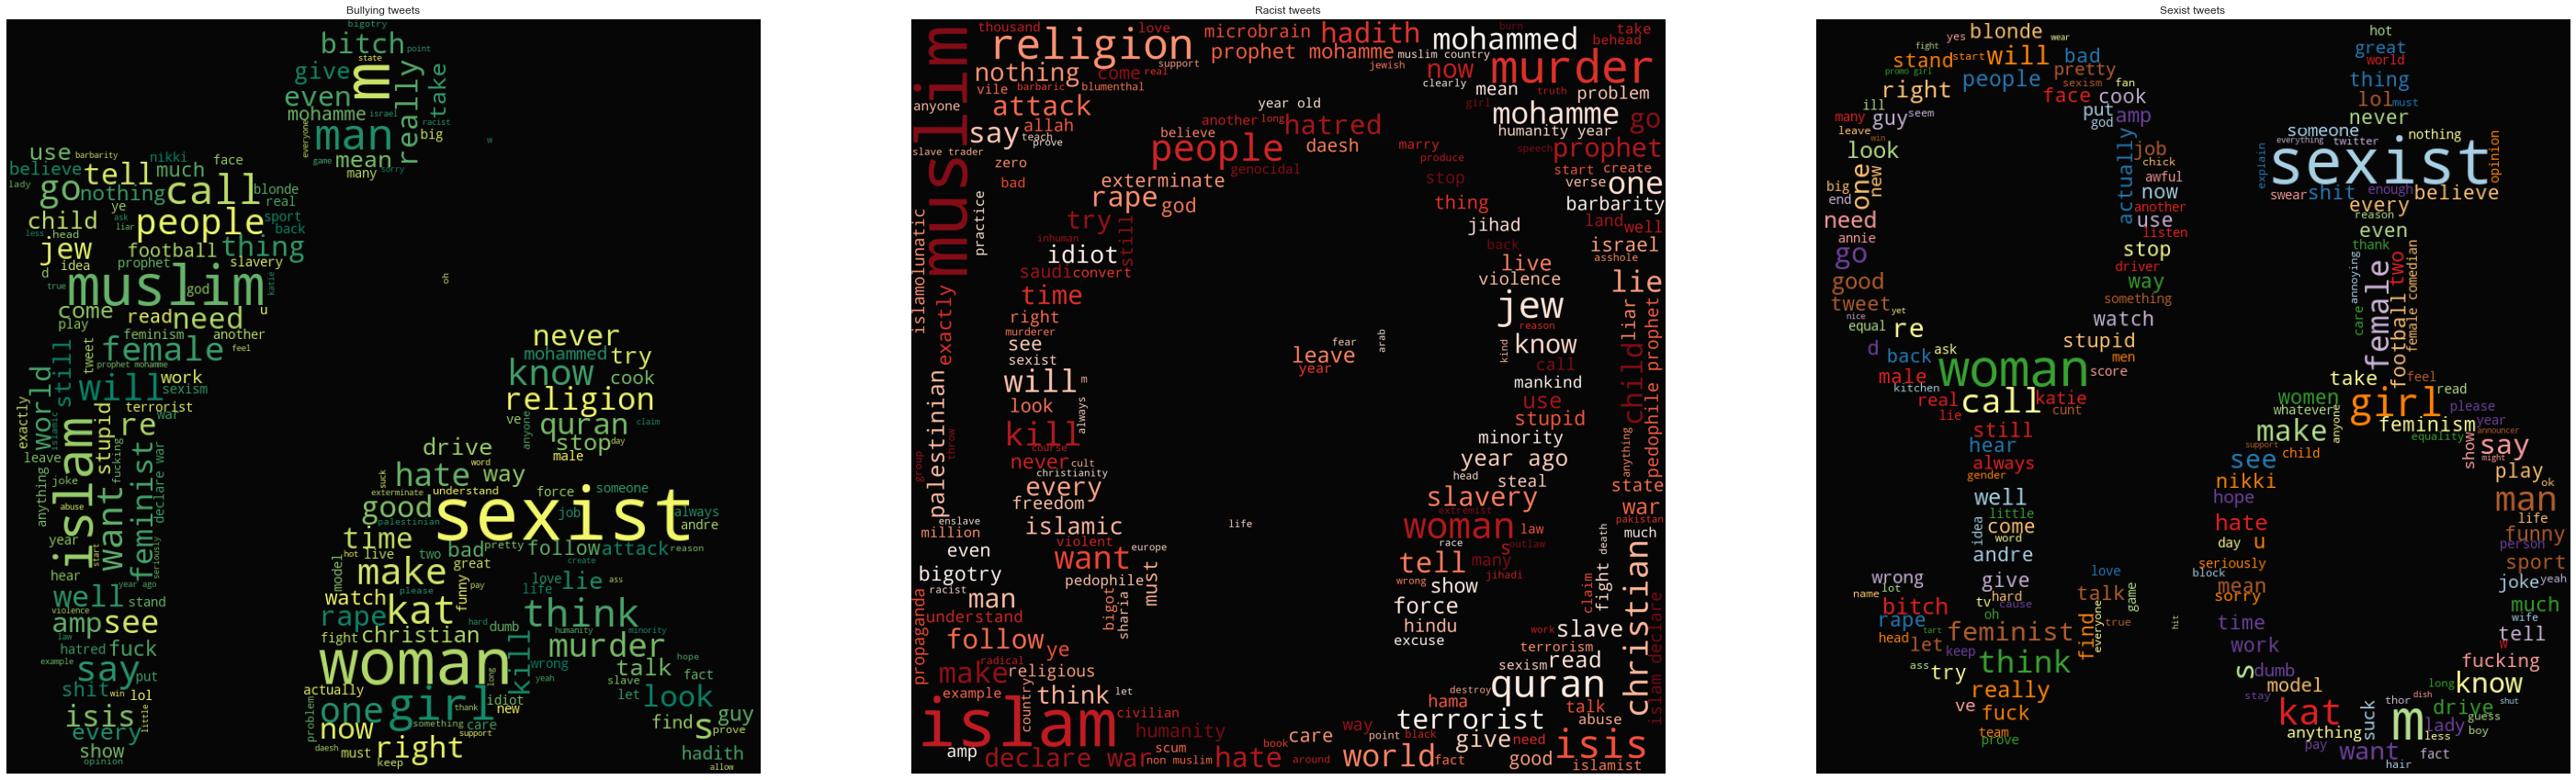

In [34]:
stopword=set(STOPWORDS)
plt.figure(figsize=(50,70))

plt.subplot(131) ## Common words in all bullying tweets-----------------------------------------------------------------------------------
 
bully_text = file[file.Label==1.0]["Text"].values# 1. Get text
Text = ''
for text in bully_text:
    Text += text

# 2. Load png image from url and create mask
image_url = 'https://raw.githubusercontent.com/harshjadhav890/cyberbullying_detection/main/bullying-computer-icons-harassment-clip-art-bully.jpg'
response = requests.get(image_url, stream=True)
response.raise_for_status()
mask = np.array(Image.open(response.raw))

 
wc = WordCloud(background_color = 'black', mask = mask, contour_width = 2,         # 3. Plot wordcloud
     contour_color = 'black', colormap = 'BuPu_r', width = 800, height = 800, stopwords = stopword).generate(Text)
plt.axis("off")
plt.title('Bullying tweets')
plt.imshow(wc.recolor(colormap= 'summer' , random_state=244), alpha=0.98)


## Common words in all racist tweets-----------------------------------------------------------------------------------
 
plt.subplot(132)# Repeat for other plots
bully_text = file[file.Annotation=='racism']["Text"].values
Text = ''
for text in bully_text:
    Text += text
    
image_url = 'https://clipart-library.com/img1/1475559.png'
response = requests.get(image_url, stream=True)
response.raise_for_status()
mask = np.array(Image.open(response.raw))

wc = WordCloud(background_color = 'black', mask = mask, contour_width = 2,
     contour_color = 'black', colormap = 'BuPu_r', width = 800, height = 800, stopwords = stopword).generate(Text)
plt.title('Racist tweets')
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)


## Common words in all sexist tweets-----------------------------------------------------------------------------------
plt.subplot(133)
bully_text = file[file.Annotation=='sexism']["Text"].values
Text = ''
for text in bully_text:
    Text += text
    
image_url = 'https://raw.githubusercontent.com/harshjadhav890/cyberbullying_detection/main/woman-gender-symbol-male-female-text-line-circle-number-png-clipart.jpg'
response.raise_for_status()
response = requests.get(image_url, stream=True)
mask = np.array(Image.open(response.raw))

wc = WordCloud(background_color = 'black', mask = mask, contour_width = 2,
     contour_color = 'black', colormap = 'BuPu_r', width = 800, height = 800, stopwords = stopword).generate(Text)
plt.axis("off")
plt.title('Sexist tweets')
plt.imshow(wc.recolor(colormap= 'Paired_r' , random_state=244), alpha=0.98)

plt.show()

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Splitting</p> 

In [35]:
file['Text'].values.reshape(-1, 1)

array([['    I read they in contextno change in mean the history of islamic slavery'],
       ['  now you idiot claim that people who try to stop he from become a terrorist make he a terrorist islamically brain dead'],
       ['   call I sexist but when I go to an auto place i d rather talk to a guy'],
       ...,
       ['   deconstruct lemon tartcan we please go just one season of   without someone call something deconstruct'],
       ['    you be too stupid to talk to block'],
       ['and before you protest that you re not mad there s not much other reason you d be out tweet at woman about feminism']],
      dtype=object)

In [36]:
ros = RandomOverSampler(random_state =42)
X = file["Text"].values.reshape(-1,1)
y=file["Label"].values


In [37]:
X_resampled,y_resampled = ros.fit_resample(X,y)

In [38]:
X_resampled= [str(obj) for obj in X_resampled]
X_resampled = np.array(X_resampled)

In [39]:
X_resampled

array(["['    I read they in contextno change in mean the history of islamic slavery']",
       "['  now you idiot claim that people who try to stop he from become a terrorist make he a terrorist islamically brain dead']",
       "['   call I sexist but when I go to an auto place i d rather talk to a guy']",
       ...,
       "['   go ahead and call I sexist but scandalous woman be wayyy lower in my book than scandalous man mainly cause I want to be']",
       "['   I m not sexist but why be there   girl in the weight room   no way']",
       "['  for their trolling   and expose their hypocritical whining about man use   or']"],
      dtype='<U161')

In [40]:
sentences = [word_tokenize(text) for text in X_resampled]

In [42]:
word2vec_model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)  # Adjust parameters as needed



In [43]:
def get_embedding(text):
    tokens = word_tokenize(text)
    tokens=[token for token in tokens if token in word2vec_model.wv.key_to_index]
    if len(tokens)>0:
        return np.mean([word2vec_model.wv[t] for t in tokens],axis=0)
    else:
        return none

In [44]:
X_resampled = [get_embedding(text) for text in X_resampled]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, random_state =42)


In [48]:
X_train = np.array(X_train)
X_test = np.array(X_test)

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ML Models</p> 

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix 
import pandas as pd

In [51]:

def compare_models(x_train, y_train, x_test, y_test):

  # Define models
  models = {
      'Random Forest': RandomForestClassifier(),
      'SVM': SVC(),
      'Naive Bayes': GaussianNB()
  }

  # Define evaluation metrics function
  def evaluate_model(model_name, model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    return pd.Series({'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'Recall': recall}), cm

  # Evaluate models and store results in a DataFrame
  results = []
  CMs = {}
  for name, model in tqdm(models.items(), desc="Evaluating Models"):
    res, cm = evaluate_model(name, model)
    results.append(res)
    CMs[name] = cm
    

  return pd.DataFrame(results).set_index('Model'), CMs

 

## Evaluating ML Models

In [52]:
# first Spli
results_df, CMs = compare_models(X_train, y_train, X_test, y_test)
results_df.head()
 

Evaluating Models: 100%|█████████████████████████████████████████████████████████████████| 3/3 [02:07<00:00, 42.55s/it]


,Accuracy,F1-Score,Recall
Model,,,
Random Forest,0.889372,0.889364,0.889372
SVM,0.712889,0.706007,0.712889
Naive Bayes,0.675071,0.668209,0.675071


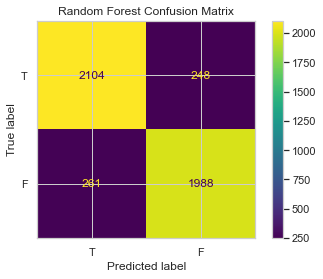

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay 
class_labels = ["T","F"]
disp = ConfusionMatrixDisplay(confusion_matrix=CMs["Random Forest"], display_labels=class_labels) 
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.savefig("Random Forest Confusion Matrix")
plt.show()

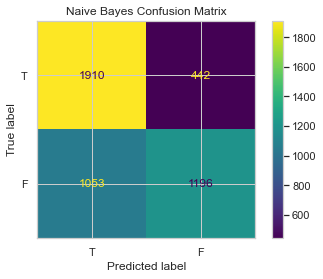

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay 
class_labels = ["T","F"]
disp = ConfusionMatrixDisplay(confusion_matrix=CMs["Naive Bayes"], display_labels=class_labels) 
disp.plot()
plt.title("Naive Bayes Confusion Matrix")
plt.savefig("Naive Bayes Confusion Matrix")
plt.show()

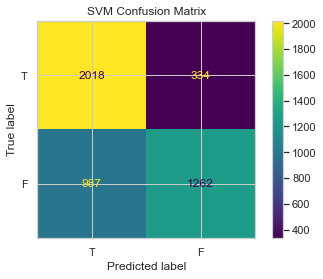

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay 
class_labels = ["T","F"]
disp = ConfusionMatrixDisplay(confusion_matrix=CMs["SVM"], display_labels=class_labels) 
disp.plot()
plt.title("SVM Confusion Matrix")
plt.savefig("SVM Confusion Matrix")
plt.show()

In [56]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Step 5: Model Training (Using a RandomForestClassifier as an example)
X_train = np.array(X_train)
X_test = np.array(X_test)

In [57]:
results_df2, CMs = compare_models(X_train, y_train, X_test, y_test)
results_df2.head()

Evaluating Models: 100%|█████████████████████████████████████████████████████████████████| 3/3 [01:47<00:00, 35.68s/it]


,Accuracy,F1-Score,Recall
Model,,,
Random Forest,0.877844,0.877786,0.877844
SVM,0.707579,0.699699,0.707579
Naive Bayes,0.674105,0.667222,0.674105


<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Using DL</p> 

In [58]:
 
ros = RandomOverSampler(random_state=42)      # using the cleaned version of the dataset
X = file['Text'].values.reshape(-1, 1)
y = file['Label'].values
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled = X_resampled[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [59]:
from keras.preprocessing import sequence, text
from tensorflow.keras.preprocessing.sequence import pad_sequences


token = text.Tokenizer(num_words=None)
max_len = 40

token.fit_on_texts(list(X_train) + list(X_test))
xtrain_seq = token.texts_to_sequences(X_train)
xvalid_seq = token.texts_to_sequences(X_test)

#zero pad the sequences
xtrain_pad =  pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad =  pad_sequences(xvalid_seq, maxlen=max_len)


In [60]:
word_index = token.word_index

In [61]:
print('Preprocessed text', X_train[1])
print('\nTokenized text', xtrain_seq[1])
print('\nPadded text', xtrain_pad[1])
print('\nPadded text Length: ', len(xtrain_pad[1]))

Preprocessed text    I m not sexist but girl should not wrestle

Tokenized text [3, 18, 4, 19, 14, 45, 71, 4, 2158]

Padded text [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    3   18    4   19   14   45   71    4 2158]

Padded text Length:  40


## CNN

In [62]:
y_train.shape

(18401,)

In [63]:
import keras
from keras.utils import to_categorical 
y_train_cat = to_categorical(y_train, num_classes=2) 

In [64]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [65]:

from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Embedding, Dense
from tensorflow.keras.models import Sequential

with strategy.scope():
  
  model = Sequential()  # Define the CNN model  
  model.add(Embedding(len(word_index) + 1,           # Embedding layer for word representation
                      300,
                      input_length=max_len))
  model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))      # Convolutional layers to extract features
  model.add(MaxPooling1D(pool_size=2))
  model.add(GlobalAveragePooling1D())                  # Global Average Pooling to capture overall feature representation
  model.add(Dense(2, activation='softmax'))  # Dense layer for multi-class classification
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 300)           3802200   
                                                                 
 conv1d (Conv1D)             (None, 38, 128)           115328    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 128)          0         
 )                                                               
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 3,917,786
Trainable params: 3,917,786
Non-

In [66]:
history = model.fit(xtrain_pad, y_train_cat, epochs=10, batch_size=64*strategy.num_replicas_in_sync)

Epoch 1/10
288/288 [==============================] - 21s 67ms/step - loss: 0.4893 - accuracy: 0.7599
Epoch 2/10
288/288 [==============================] - 20s 70ms/step - loss: 0.3060 - accuracy: 0.8788
Epoch 3/10
288/288 [==============================] - 19s 67ms/step - loss: 0.2169 - accuracy: 0.9182
Epoch 4/10
288/288 [==============================] - 20s 69ms/step - loss: 0.1582 - accuracy: 0.9417
Epoch 5/10
288/288 [==============================] - 20s 70ms/step - loss: 0.1174 - accuracy: 0.9562
Epoch 6/10
288/288 [==============================] - 21s 73ms/step - loss: 0.0936 - accuracy: 0.9658
Epoch 7/10
288/288 [==============================] - 23s 82ms/step - loss: 0.0780 - accuracy: 0.9722
Epoch 8/10
288/288 [==============================] - 21s 73ms/step - loss: 0.0641 - accuracy: 0.9776
Epoch 9/10
288/288 [==============================] - 20s 69ms/step - loss: 0.0553 - accuracy: 0.9813
Epoch 10/10
288/288 [==============================] - 19s 67ms/step - loss: 0.052

In [67]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('cnn train_history 1.csv', index=False)
history_df.head(10)


,loss,accuracy
0,0.489329,0.759850
1,0.306023,0.878757
2,0.216907,0.918157
3,0.158220,0.941688
4,0.117449,0.956198
5,0.093615,0.965763
6,0.078047,0.972175
7,0.064109,0.977610
8,0.055329,0.981251
9,0.052287,0.982392


## Evaluating CNN model

In [68]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
import pandas as pd

def evaluate_CNNmodel(X_train, X_test, y_train, y_test, model=None):
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=1)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  results_df = pd.DataFrame({
      "Metric": ["Accuracy", "F1-Score", "Recall"],
      "Value": [accuracy, f1, recall]
  })

  return results_df, cm

In [69]:
model_results, CNN_cm = evaluate_CNNmodel(X_train, xvalid_pad, y_train, y_test, model)
print(model_results)

144/144 [==============================] - 1s 4ms/step
     Metric     Value
0  Accuracy  0.868072
1  F1-Score  0.869659
2    Recall  0.900400


<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:lightblue;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Predicting output from CNN model on given input</p> 

In [80]:
def preprocess_input(text,tokenizer,max_len):
    cleaned_text = clean_tweet(text)
    seq = tokenizer.texts_to_sequences([cleaned_text])
    padded_seq = pad_sequences(seq,maxlen = max_len)
    return padded_seq

In [81]:
def predict(text,model,tokenizer,max_len):
    preprocessed_input = preprocess_input(text,tokenizer,max_len)
    predictions = model.predict(preprocessed_input)
    predicted_class = np.argmax(predictions,axis=1)[0]
    return predicted_class

In [82]:
input_text="call I sexist but when I go to an auto place i d rather talk to a guy"
predicted_label = predict(input_text,model,token,max_len)
print(f"Predictions:{predicted_label}")

1/1 [==============================] - 0s 24ms/step
Predictions:1


In [116]:
input_text=' you are awesome'

predicted_label = predict(input_text,model,token,max_len)
print(f"Predictions:{predicted_label}")

1/1 [==============================] - 0s 19ms/step
Predictions:0
